<a href="https://colab.research.google.com/github/Farouk96/Dogs_classification_deeplearning/blob/main/Dog_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# system libraries
import os
import warnings
warnings.filterwarnings("ignore")
from time import time
import gc

# data structure libraries
import numpy as np
import pandas as pd

# data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from IPython.display import SVG
import seaborn as sns
from PIL import Image
import pathlib
import IPython.display as display

# deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.data import experimental
from tensorflow.keras.utils import plot_model, model_to_dot

In [ ]:
# loading dataset and selecting images parameters
path = '/content/drive/MyDrive/ P6_Dogs/reduced _dataset'
img_width, img_height = 224, 224
channels = 3
batch_size = 32
image_arr_size= img_width * img_height * channels

#Essai avec 08 races de chiens - Pas de prétraitement + Convnet

Afin de développer notre système de vision par ordinateur, sept races de chiens ont été choisies. Ce choix était là pour simplifier l'apprentissage des différents modèles et la compréhension des différentes étapes.

##1) Data preparation

À l'aide des fonctions Tensorflow, un ensemble d'apprentissage et de validation a été créé. Les caractéristiques des images ont été définies comme suit :

- Width: 224,
- Height: 224,
- Channels: 3,
Chaque paramètre a été enregistré dans des variables afin d'aider à la réplicabilité de nos méthodes.

In [ ]:
# Creating a train set
train_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1376 files belonging to 8 classes.
Using 1101 files for training.


In [ ]:
# Creating a validation set
val_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1376 files belonging to 8 classes.
Using 275 files for validation.


In [ ]:
# Displaying names of breed
class_names = train_set.class_names
print(class_names)

['n02107908-Appenzeller', 'n02108422-bull_mastiff', 'n02109525-Saint_Bernard', 'n02110627-affenpinscher', 'n02111500-Great_Pyrenees', 'n02112137-chow', 'n02113023-Pembroke', 'n02113799-standard_poodle']


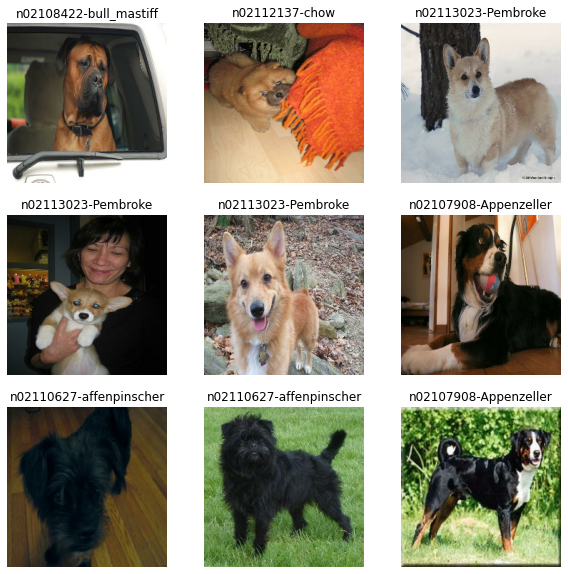

In [ ]:
# Displaying some pictures of train set
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


Deux ensembles de données ont été créés avec nos 08 races. L'ensemble de données d'entraînement contient 80 % des données et l'ensemble de données de validation en contient 20 %.

##2) Convnet modelisation

In [ ]:
num_classes = 8

# Architecture of our CNN
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channels)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
  optimizer='adam', 
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 32)       

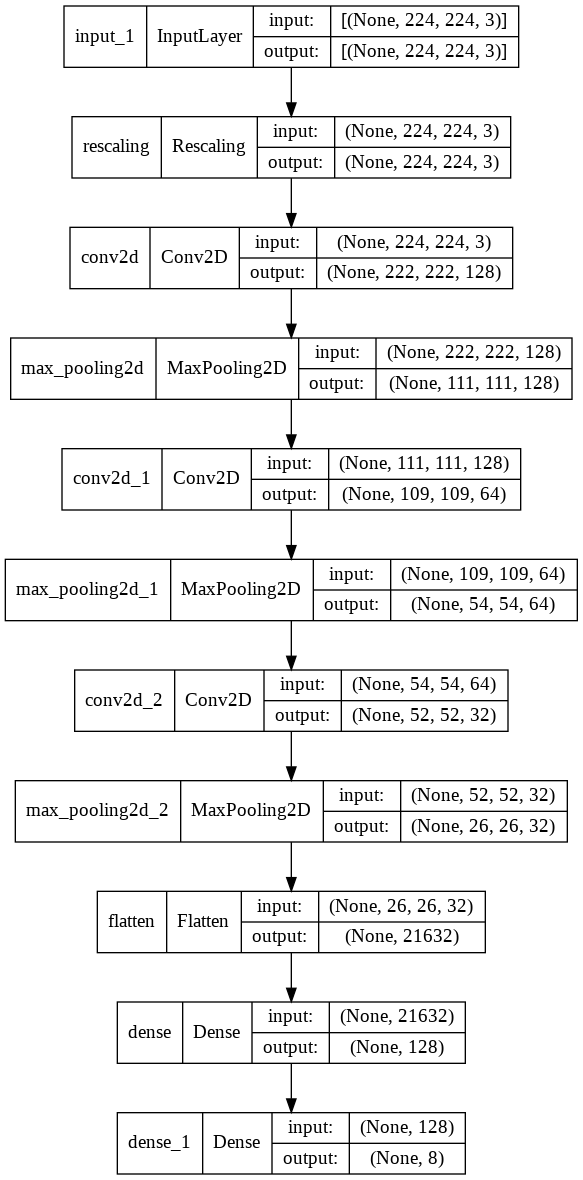

In [ ]:
# Displaying model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
t0 = time()

epochs = 10

# training model + time measure
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)# This callback will stop the training when there is no improvement in 
                                                                         #the loss for three consecutive epochs.
history = model.fit(
  train_set,
  validation_data=val_set,
  callbacks=[callback],
  epochs=epochs)

print("Done in %0.3fs." % (time() - t0))

Epoch 1/10
35/35 [==============================] - 11s 268ms/step - loss: 2.0554 - accuracy: 0.2107 - val_loss: 1.9191 - val_accuracy: 0.3127
Epoch 2/10
35/35 [==============================] - 10s 256ms/step - loss: 1.6739 - accuracy: 0.4069 - val_loss: 1.9332 - val_accuracy: 0.3345
Epoch 3/10
35/35 [==============================] - 10s 260ms/step - loss: 1.4141 - accuracy: 0.4941 - val_loss: 1.7777 - val_accuracy: 0.4036
Epoch 4/10
35/35 [==============================] - 10s 259ms/step - loss: 1.0747 - accuracy: 0.6458 - val_loss: 1.7086 - val_accuracy: 0.4473
Epoch 5/10
35/35 [==============================] - 10s 258ms/step - loss: 0.5898 - accuracy: 0.8147 - val_loss: 2.1611 - val_accuracy: 0.4618
Epoch 6/10
35/35 [==============================] - 10s 259ms/step - loss: 0.3096 - accuracy: 0.9019 - val_loss: 2.8709 - val_accuracy: 0.3091
Epoch 7/10
35/35 [==============================] - 10s 257ms/step - loss: 0.1647 - accuracy: 0.9519 - val_loss: 3.2986 - val_accuracy: 0.4182

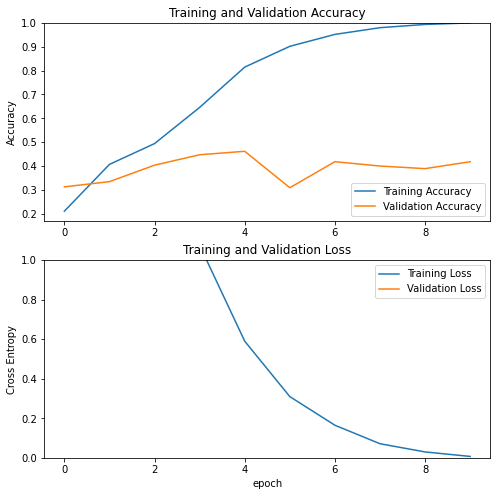

In [ ]:
# Accuracy and Loss graphical representation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Ce premier essai montre que ce CNN a réalisé des performances médiocres. Ce CNN ne prend pas beaucoup de temps,mais on peut voir du surapprentissage. Afin d'améliorer nos performances, un deuxième essai sera réalisé avec des **pré-traitements de nos images**.

In [ ]:
del train_set
del val_set
del model
del history

gc.collect()

7446

#Essai avec 08 races de chiens - prétraitement des images + Convnet

Avant de modéliser et d'utiliser un nouveau CNN, les données seront prétraitées. Certaines méthodes seront utilisées. Parmi eux, le blanchiment ou la rotation seront tentés. Cette étape a deux objectifs :

- Meilleures performances avec la structure CNN 
- Augmentation des données.

##1)Data preparation

In [ ]:
# create generator with whitening and rotation

img_gen = ImageDataGenerator(rescale=1./255,
                             zca_whitening=True,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2,
                             dtype=tf.float32)

In [ ]:
# transform & create train set

train_generator = img_gen.flow_from_directory(
    path,
    subset="training",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width), 
    color_mode='rgb',
    batch_size=batch_size)

Found 1103 images belonging to 8 classes.


In [ ]:
# transform & create validation set

validation_generator = img_gen.flow_from_directory(
    path,
    subset="validation",
    seed=42,
    class_mode='sparse',
    target_size=(img_height, img_width), 
    color_mode='rgb',
    batch_size=batch_size)

Found 273 images belonging to 8 classes.


## 2) Convnet modelisation

L'architecture de notre CNN est la même que celle du premier essai. Les données d'entrée sont différentes en raison du prétraitement et de l'augmentation des données.

In [ ]:
num_classes = 8

# Architecture of our CNN
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channels)))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
t0 = time()

epochs = 10

# training model+ time measurement

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)# This callback will stop the training when there is no improvement in 
                                                                         #the loss for three consecutive epochs.
history = model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs=epochs,
  callbacks=[callback])

print("Done in %0.3fs." % (time() - t0))

Epoch 1/10
34/34 [==============================] - 256s 8s/step - loss: 2.0811 - accuracy: 0.1401 - val_loss: 2.0697 - val_accuracy: 0.1445
Epoch 2/10
34/34 [==============================] - 258s 8s/step - loss: 1.9906 - accuracy: 0.2316 - val_loss: 1.9389 - val_accuracy: 0.2344
Epoch 3/10
34/34 [==============================] - 259s 8s/step - loss: 1.8137 - accuracy: 0.3324 - val_loss: 1.8815 - val_accuracy: 0.2500
Epoch 4/10
34/34 [==============================] - 257s 8s/step - loss: 1.7004 - accuracy: 0.3782 - val_loss: 1.9807 - val_accuracy: 0.2539
Epoch 5/10
34/34 [==============================] - 260s 8s/step - loss: 1.5715 - accuracy: 0.4398 - val_loss: 2.0284 - val_accuracy: 0.2578
Epoch 6/10
34/34 [==============================] - 256s 8s/step - loss: 1.4705 - accuracy: 0.4949 - val_loss: 1.8786 - val_accuracy: 0.2773
Epoch 7/10
34/34 [==============================] - 257s 8s/step - loss: 1.3566 - accuracy: 0.5369 - val_loss: 1.9528 - val_accuracy: 0.2812
Epoch 8/10
34

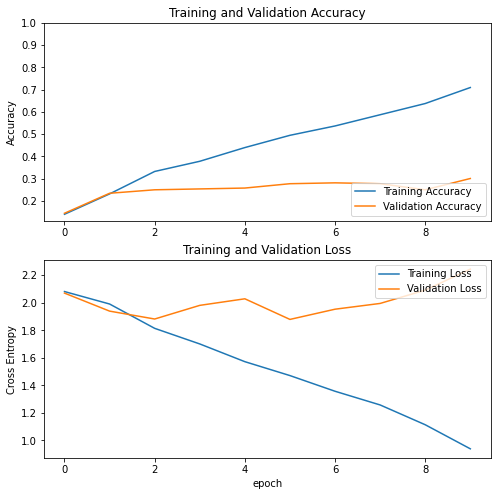

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
del validation_generator
del train_generator
del model
del history
del img_gen

gc.collect()

5957

Les performances sont améliorées et le temps consacré à l'entraînement est moins important. Cependant, certains modèles pré-entraînés peuvent nous aider à avoir de meilleures performances. Dans une seconde approche, nous utiliserons des méthodes du transfert learning.

#Transfer Learning

##1) Data préparation

In [ ]:
# Creating train set

train_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1376 files belonging to 8 classes.
Using 1101 files for training.


In [ ]:
# Creating validation set

val_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1376 files belonging to 8 classes.
Using 275 files for validation.


In [ ]:
# Creating test set

val_batches = experimental.cardinality(val_set)
test_set = val_set.take(val_batches // 5)
val_set = val_set.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % experimental.cardinality(val_set))
print('Number of test batches: %d' % experimental.cardinality(test_set))

Number of validation batches: 8
Number of test batches: 1


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_set = train_set.prefetch(buffer_size=AUTOTUNE)
val_set = val_set.prefetch(buffer_size=AUTOTUNE)
test_set = test_set.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# data augmentation layer

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip('horizontal_and_vertical', seed=42),
  layers.RandomRotation(0.2)
])

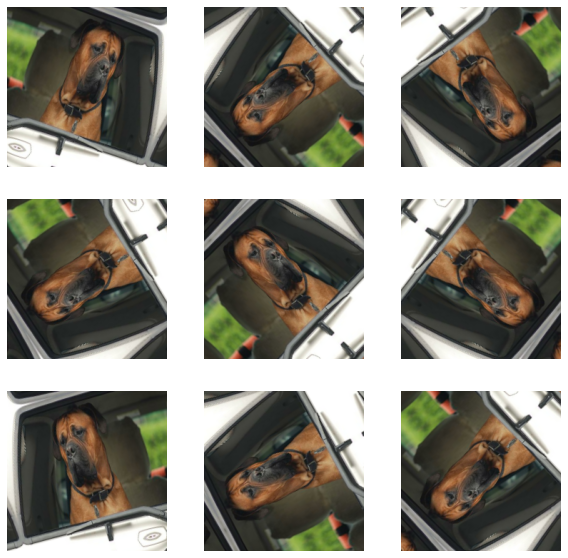

In [ ]:
for image, _ in train_set.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

##2)Transfer Learning with **MobileNetV2**

###1. **Implementation**

**MobileNetV2** est très similaire au MobileNet d'origine, sauf qu'il a un nombre de paramètres considérablement inférieur à celui du MobileNet d'origine. Les MobileNets prennent en charge toute taille d'entrée supérieure à **32 x 32**, avec des images plus grandes offrant de meilleures performances

In [ ]:
img_shape = img_height, img_width, channels
num_classes = 8

In [ ]:
preprocess_input = keras.applications.mobilenet_v2.preprocess_input
rescale = layers.Rescaling(1./127.5, offset=-1)

In [ ]:
base_model = keras.applications.MobileNetV2(
    weights="imagenet",
    input_shape= img_shape,
    include_top=False)

In [ ]:
image_batch, label_batch = next(iter(train_set))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
global_average_layer = layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = layers.Dense(num_classes, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 8)


In [ ]:
#Geler la base convolutive
base_model.trainable = False

In [ ]:
#The base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
# Architecture of MobileNetV2 with input layers, data augmentation and preprocessing layers

inputs = tf.keras.Input(shape=(img_height, img_width, channels))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

In [ ]:
es = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    mode="min")

In [ ]:
t0 = time()

epochs = 10

history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs,
  callbacks=[es])

print("Done in %0.3fs." % (time() - t0))

Epoch 1/10
35/35 [==============================] - 29s 679ms/step - loss: 2.1768 - accuracy: 0.2162 - val_loss: 1.7056 - val_accuracy: 0.4486
Epoch 2/10
35/35 [==============================] - 6s 157ms/step - loss: 1.7777 - accuracy: 0.3560 - val_loss: 1.3849 - val_accuracy: 0.6008
Epoch 3/10
35/35 [==============================] - 6s 153ms/step - loss: 1.5076 - accuracy: 0.4741 - val_loss: 1.0998 - val_accuracy: 0.7695
Epoch 4/10
35/35 [==============================] - 6s 154ms/step - loss: 1.2372 - accuracy: 0.6158 - val_loss: 0.8930 - val_accuracy: 0.8560
Epoch 5/10
35/35 [==============================] - 6s 151ms/step - loss: 1.0779 - accuracy: 0.6794 - val_loss: 0.7321 - val_accuracy: 0.9136
Epoch 6/10
35/35 [==============================] - 6s 154ms/step - loss: 0.9185 - accuracy: 0.7484 - val_loss: 0.6147 - val_accuracy: 0.9424
Epoch 7/10
35/35 [==============================] - 6s 152ms/step - loss: 0.8133 - accuracy: 0.7738 - val_loss: 0.5239 - val_accuracy: 0.9506
Epoch

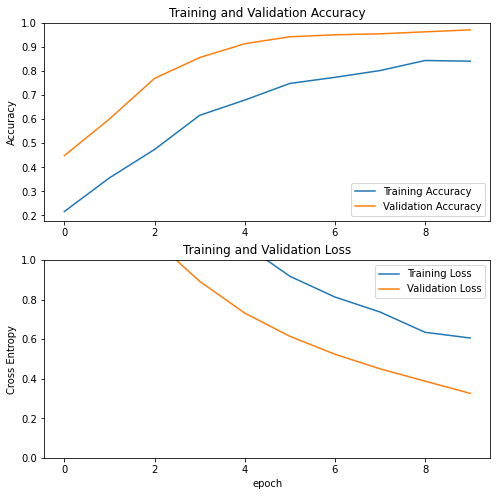

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Les performances sont meilleures avec **MobileNetV2** qu'avec CNN from scratch et le temps d'entraînement est moins important. La deuxième étape consiste à affiner notre modèle.

###Fine-tuning

In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [ ]:
fine_tune_at = 100
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Pour entraîner un modèle beaucoup plus grand et qu'on souhaite réadapter les poids pré-entraînés, il est important d'utiliser un taux d'apprentissage inférieur à ce stade. Sinon, votre modèle pourrait surdimensionner très rapidement.

In [ ]:
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate/10),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs

t0 = time()

history_fine = model.fit(train_set,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_set
                         )

print("Done in %0.3fs." % (time() - t0))

Epoch 10/20
35/35 [==============================] - 7s 182ms/step - loss: 0.1277 - accuracy: 0.9609 - val_loss: 0.0682 - val_accuracy: 0.9753
Epoch 11/20
35/35 [==============================] - 7s 181ms/step - loss: 0.1434 - accuracy: 0.9500 - val_loss: 0.0715 - val_accuracy: 0.9712
Epoch 12/20
35/35 [==============================] - 7s 181ms/step - loss: 0.1302 - accuracy: 0.9564 - val_loss: 0.0693 - val_accuracy: 0.9753
Epoch 13/20
35/35 [==============================] - 7s 182ms/step - loss: 0.1125 - accuracy: 0.9655 - val_loss: 0.0711 - val_accuracy: 0.9753
Epoch 14/20
35/35 [==============================] - 7s 181ms/step - loss: 0.1191 - accuracy: 0.9600 - val_loss: 0.0566 - val_accuracy: 0.9794
Epoch 15/20
35/35 [==============================] - 7s 179ms/step - loss: 0.0897 - accuracy: 0.9700 - val_loss: 0.0748 - val_accuracy: 0.9753
Epoch 16/20
35/35 [==============================] - 7s 181ms/step - loss: 0.1120 - accuracy: 0.9637 - val_loss: 0.0713 - val_accuracy: 0.9753

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

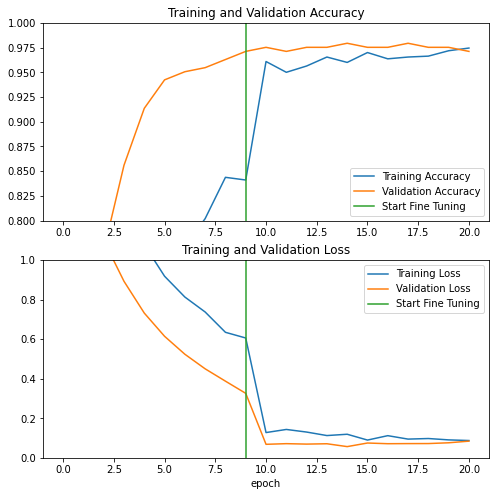

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([epochs-1,epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([epochs-1,epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_set)
print('Test accuracy :', accuracy)

1/1 [==============================] - 1s 922ms/step - loss: 0.0291 - accuracy: 1.0000
Test accuracy : 1.0


In [ ]:
del model
del base_model
del history
del accuracy
del loss
gc.collect()

9890

##3) Transfert learning with Inception V3


C'est un modèle avec plus de 300 couches. On peut s'attendre à de meilleures performances pour ce modèle.

###Implementation

In [ ]:
rescale = layers.Rescaling(1./255)
preprocess_input = keras.applications.inception_v3.preprocess_input
base_model = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    input_shape= img_shape,
    include_top=False)

In [ ]:
image_batch, label_batch = next(iter(train_set))
feature_batch = base_model(image_batch)

In [ ]:
val_batches = experimental.cardinality(val_set)
test_set = val_set.take(val_batches // 5)
val_set = val_set.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % experimental.cardinality(val_set))
print('Number of test batches: %d' % experimental.cardinality(test_set))

Number of validation batches: 7
Number of test batches: 1


In [ ]:
global_average_layer = layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [ ]:
prediction_layer = layers.Dense(num_classes, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 8)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, channels))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0   

In [ ]:
t0 = time()

epochs = 10

history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs)

print("Done in %0.3fs." % (time() - t0))

Epoch 1/10
35/35 [==============================] - 19s 364ms/step - loss: 2.3505 - accuracy: 0.2125 - val_loss: 1.5413 - val_accuracy: 0.4455
Epoch 2/10
35/35 [==============================] - 9s 234ms/step - loss: 1.7085 - accuracy: 0.3924 - val_loss: 0.9966 - val_accuracy: 0.7678
Epoch 3/10
35/35 [==============================] - 9s 233ms/step - loss: 1.3360 - accuracy: 0.5767 - val_loss: 0.6943 - val_accuracy: 0.9194
Epoch 4/10
35/35 [==============================] - 9s 234ms/step - loss: 1.0213 - accuracy: 0.6903 - val_loss: 0.4834 - val_accuracy: 0.9573
Epoch 5/10
35/35 [==============================] - 9s 234ms/step - loss: 0.8597 - accuracy: 0.7511 - val_loss: 0.3618 - val_accuracy: 0.9668
Epoch 6/10
35/35 [==============================] - 9s 234ms/step - loss: 0.7637 - accuracy: 0.7711 - val_loss: 0.2579 - val_accuracy: 0.9716
Epoch 7/10
35/35 [==============================] - 9s 233ms/step - loss: 0.6568 - accuracy: 0.8102 - val_loss: 0.2177 - val_accuracy: 0.9810
Epoch

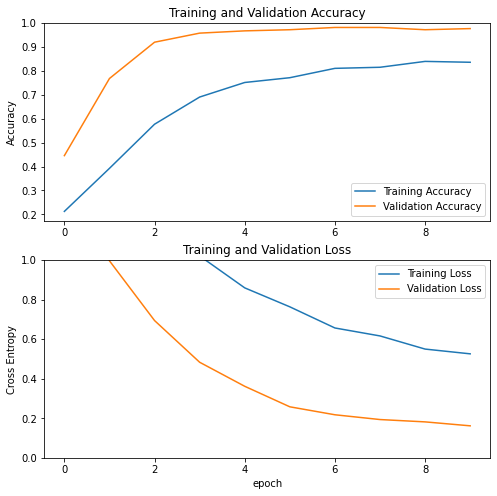

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

###Fine-tuning

In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  311


In [ ]:
fine_tune_at = 100

# Freeze all the layers before the 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate/10),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs

t0 = time()

history_fine = model.fit(train_set,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_set)

print("Done in %0.3fs." % (time() - t0))

Epoch 10/20
35/35 [==============================] - 27s 509ms/step - loss: 0.3319 - accuracy: 0.8965 - val_loss: 0.0672 - val_accuracy: 0.9716
Epoch 11/20
35/35 [==============================] - 16s 437ms/step - loss: 0.1881 - accuracy: 0.9391 - val_loss: 0.0753 - val_accuracy: 0.9763
Epoch 12/20
35/35 [==============================] - 16s 436ms/step - loss: 0.1568 - accuracy: 0.9473 - val_loss: 0.0753 - val_accuracy: 0.9810
Epoch 13/20
35/35 [==============================] - 16s 435ms/step - loss: 0.1257 - accuracy: 0.9609 - val_loss: 0.0692 - val_accuracy: 0.9763
Epoch 14/20
35/35 [==============================] - 16s 435ms/step - loss: 0.1137 - accuracy: 0.9619 - val_loss: 0.0715 - val_accuracy: 0.9810
Epoch 15/20
35/35 [==============================] - 16s 439ms/step - loss: 0.1019 - accuracy: 0.9691 - val_loss: 0.0847 - val_accuracy: 0.9810
Epoch 16/20
35/35 [==============================] - 16s 436ms/step - loss: 0.0726 - accuracy: 0.9737 - val_loss: 0.0334 - val_accuracy:

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

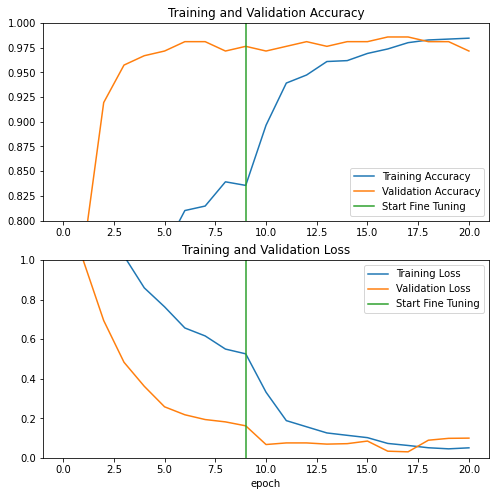

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([epochs-1,epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([epochs-1,epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_set)
print('Test accuracy :', accuracy)

1/1 [==============================] - 1s 1s/step - loss: 8.2856e-04 - accuracy: 1.0000
Test accuracy : 1.0


In [ ]:
del model
del base_model
del history
del accuracy,loss

gc.collect()

17078

##Transfert learning with ResNet50V2

Il compte 150 couches.

###Implementation

In [ ]:
rescale = layers.Rescaling(1./255)
preprocess_input = keras.applications.resnet_v2.preprocess_input
base_model = keras.applications.resnet_v2.ResNet50V2(
    weights="imagenet",
    input_shape= img_shape,
    include_top=False)

In [ ]:
image_batch, label_batch = next(iter(train_set))
feature_batch = base_model(image_batch)

In [ ]:
val_batches = experimental.cardinality(val_set)
test_set = val_set.take(val_batches // 5)
val_set = val_set.skip(val_batches // 5)

In [ ]:
print('Number of validation batches: %d' % experimental.cardinality(val_set))
print('Number of test batches: %d' % experimental.cardinality(test_set))

Number of validation batches: 6
Number of test batches: 1


In [ ]:
global_average_layer = layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [ ]:
prediction_layer = layers.Dense(num_classes, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 8)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, channels))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = layers.Flatten()(x) 
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0   

In [ ]:
t0 = time()

epochs = 10

history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs)


print("Done in %0.3fs." % (time() - t0))

Epoch 1/10
35/35 [==============================] - 18s 350ms/step - loss: 2.7060 - accuracy: 0.1617 - val_loss: 1.9559 - val_accuracy: 0.3073
Epoch 2/10
35/35 [==============================] - 10s 260ms/step - loss: 2.0703 - accuracy: 0.2643 - val_loss: 1.4138 - val_accuracy: 0.5587
Epoch 3/10
35/35 [==============================] - 10s 260ms/step - loss: 1.6220 - accuracy: 0.4305 - val_loss: 1.0641 - val_accuracy: 0.7151
Epoch 4/10
35/35 [==============================] - 10s 260ms/step - loss: 1.2962 - accuracy: 0.5531 - val_loss: 0.7901 - val_accuracy: 0.8156
Epoch 5/10
35/35 [==============================] - 10s 259ms/step - loss: 1.1025 - accuracy: 0.6113 - val_loss: 0.5910 - val_accuracy: 0.8659
Epoch 6/10
35/35 [==============================] - 10s 259ms/step - loss: 0.9314 - accuracy: 0.6957 - val_loss: 0.5020 - val_accuracy: 0.8994
Epoch 7/10
35/35 [==============================] - 10s 259ms/step - loss: 0.8242 - accuracy: 0.7257 - val_loss: 0.3586 - val_accuracy: 0.9330

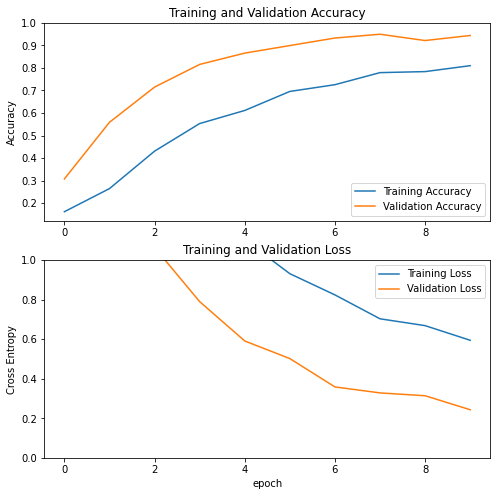

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

###Fine-tuning

In [ ]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  190


In [ ]:
fine_tune_at = 100

# Freeze all the layers before the 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate/10),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs

t0 = time()

history_fine = model.fit(train_set,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_set)


print("Done in %0.3fs." % (time() - t0))

Epoch 10/20
35/35 [==============================] - 24s 489ms/step - loss: 0.4795 - accuracy: 0.8429 - val_loss: 0.1635 - val_accuracy: 0.9553
Epoch 11/20
35/35 [==============================] - 16s 438ms/step - loss: 0.3049 - accuracy: 0.8974 - val_loss: 0.1460 - val_accuracy: 0.9553
Epoch 12/20
35/35 [==============================] - 16s 439ms/step - loss: 0.2441 - accuracy: 0.9173 - val_loss: 0.1226 - val_accuracy: 0.9553
Epoch 13/20
35/35 [==============================] - 16s 437ms/step - loss: 0.2094 - accuracy: 0.9264 - val_loss: 0.1071 - val_accuracy: 0.9665
Epoch 14/20
35/35 [==============================] - 16s 438ms/step - loss: 0.1902 - accuracy: 0.9301 - val_loss: 0.0993 - val_accuracy: 0.9721
Epoch 15/20
35/35 [==============================] - 16s 438ms/step - loss: 0.1359 - accuracy: 0.9491 - val_loss: 0.1146 - val_accuracy: 0.9553
Epoch 16/20
35/35 [==============================] - 16s 437ms/step - loss: 0.1285 - accuracy: 0.9573 - val_loss: 0.1028 - val_accuracy:

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

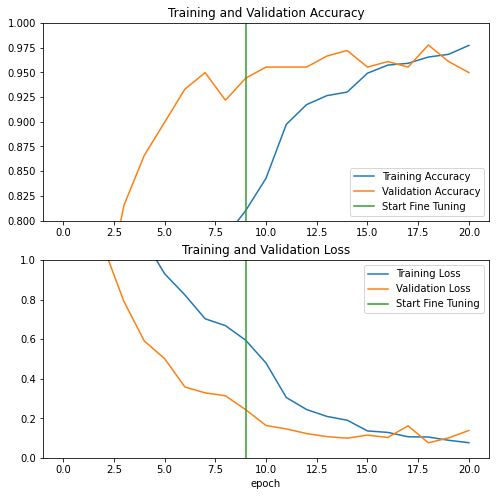

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([epochs-1,epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([epochs-1,epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_set)
print('Test accuracy :', accuracy)

1/1 [==============================] - 1s 1s/step - loss: 0.0168 - accuracy: 1.0000
Test accuracy : 1.0


In [ ]:
#del model
#del base_model
#del history
#del accuracy,loss

gc.collect()

41918

#Generalization with 120 breeds

##1) Data augmentation & preprocessing

In [3]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

#prepare train data generator with necessary augmentations and validation split
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./127.5,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.25)

In [4]:
file_path= '/content/drive/MyDrive/ P6_Dogs/Images'

In [5]:
#generate training data
print('Train Data')
train_data = train_datagen.flow_from_directory(file_path,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    subset="training")

#generate validation data
print('\nValidation Data')
valid_data = train_datagen.flow_from_directory(
    file_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='validation')

Train Data
Found 15482 images belonging to 120 classes.

Validation Data
Found 5100 images belonging to 120 classes.


##2) Modelisation with MobileNetV2

###Model configuration & training

In [6]:
#initialise base model
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
base_model = keras.applications.mobilenet_v2.MobileNetV2(input_shape=IMG_SHAPE, input_tensor=None,
                                                include_top=False, 
                                                weights='imagenet')
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [7]:
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(320, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(320, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [ ]:
file_path= '/content/drive/MyDrive/ P6_Dogs/Best_model.hdf5'

In [ ]:
mc=keras.callbacks.ModelCheckpoint(
    file_path,
    monitor="val_loss",
    mode="auto")

In [ ]:
#compile model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 320)               409920    
                                                                 
 dropout_3 (Dropout)         (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 120)               38520     
                                                                 
Total params: 2,706,424
Trainable params: 448,440
Non-

In [ ]:
t0 = time()

epochs = 10

history = model.fit(
  train_data,
  validation_data=valid_data,
  epochs=epochs,
  callbacks=[mc])


print("Done in %0.3fs." % (time() - t0))

Epoch 1/10
484/484 [==============================] - 4016s 8s/step - loss: 4.2310 - accuracy: 0.1177 - val_loss: 3.2783 - val_accuracy: 0.3008
Epoch 2/10
484/484 [==============================] - 872s 2s/step - loss: 2.7898 - accuracy: 0.3469 - val_loss: 2.1927 - val_accuracy: 0.4749
Epoch 3/10
484/484 [==============================] - 874s 2s/step - loss: 2.1424 - accuracy: 0.4457 - val_loss: 1.8429 - val_accuracy: 0.5278
Epoch 4/10
484/484 [==============================] - 858s 2s/step - loss: 1.8673 - accuracy: 0.5018 - val_loss: 1.7191 - val_accuracy: 0.5463
Epoch 5/10
484/484 [==============================] - 859s 2s/step - loss: 1.7222 - accuracy: 0.5300 - val_loss: 1.6160 - val_accuracy: 0.5569
Epoch 6/10
484/484 [==============================] - 856s 2s/step - loss: 1.6158 - accuracy: 0.5563 - val_loss: 1.5591 - val_accuracy: 0.5737
Epoch 7/10
484/484 [==============================] - 869s 2s/step - loss: 1.5498 - accuracy: 0.5687 - val_loss: 1.5188 - val_accuracy: 0.577

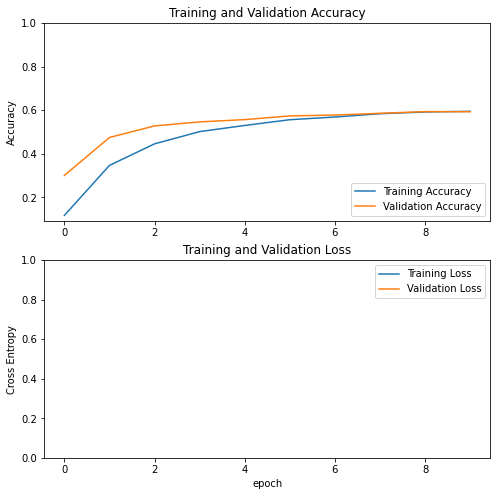

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc

[0.1177496463060379,
 0.34685441851615906,
 0.44567885994911194,
 0.5018085241317749,
 0.5299702882766724,
 0.5563234686851501,
 0.5686603784561157,
 0.5837746858596802,
 0.5917840003967285,
 0.5947551727294922]

In [ ]:
val_acc

[0.30078431963920593,
 0.4749019742012024,
 0.5278431177139282,
 0.5462744832038879,
 0.5568627715110779,
 0.5737254619598389,
 0.5776470303535461,
 0.5856862664222717,
 0.5933333039283752,
 0.592941164970398]

In [ ]:
loss

[4.23097038269043,
 2.789823293685913,
 2.1423587799072266,
 1.8672807216644287,
 1.7221797704696655,
 1.6158174276351929,
 1.5497668981552124,
 1.4850497245788574,
 1.4607232809066772,
 1.4320708513259888]

In [ ]:
val_loss

[3.278341770172119,
 2.192716598510742,
 1.8429036140441895,
 1.719102382659912,
 1.6159512996673584,
 1.559098720550537,
 1.5187541246414185,
 1.4827440977096558,
 1.4778242111206055,
 1.437542200088501]

##3)Fine-tunning

In [8]:
base_model.trainable = True

In [9]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [10]:
fine_tune_at = 110

# Freeze all the layers before the 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [11]:
#compile model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9,learning_rate=0.01/10), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 320)               409920    
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               38520     
                                                                 
Total params: 2,706,424
Trainable params: 2,191,608
Non-

In [12]:
file_path= "/content/drive/MyDrive/ P6_Dogs/fine_tunning_model.hdf5"

In [13]:
mc=keras.callbacks.ModelCheckpoint(
    file_path,
    monitor="val_loss",
    mode="auto")

es= keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    mode="auto")

In [14]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

t0 = time()

history_fine = model.fit(train_data,
                         epochs=total_epochs,
                         initial_epoch= 9,
                         validation_data=valid_data,
                         callbacks=[es,mc])

print("Done in %0.3fs." % (time() - t0))

Epoch 10/20
484/484 [==============================] - 4664s 10s/step - loss: 3.4442 - accuracy: 0.2314 - val_loss: 2.1710 - val_accuracy: 0.4290
Epoch 11/20
484/484 [==============================] - 1203s 2s/step - loss: 1.8473 - accuracy: 0.4960 - val_loss: 1.6116 - val_accuracy: 0.5598
Epoch 12/20
484/484 [==============================] - 1202s 2s/step - loss: 1.5276 - accuracy: 0.5724 - val_loss: 1.6015 - val_accuracy: 0.5635
Epoch 13/20
484/484 [==============================] - 1200s 2s/step - loss: 1.3304 - accuracy: 0.6201 - val_loss: 1.4459 - val_accuracy: 0.5925
Epoch 14/20
484/484 [==============================] - 1209s 2s/step - loss: 1.2154 - accuracy: 0.6513 - val_loss: 1.3791 - val_accuracy: 0.6031
Epoch 15/20
484/484 [==============================] - 1204s 2s/step - loss: 1.1005 - accuracy: 0.6736 - val_loss: 1.2775 - val_accuracy: 0.6267
Epoch 16/20
484/484 [==============================] - 1209s 2s/step - loss: 1.0348 - accuracy: 0.6966 - val_loss: 1.3339 - val_a

In [18]:
acc=[0.1177496463060379,
 0.34685441851615906,
 0.44567885994911194,
 0.5018085241317749,
 0.5299702882766724,
 0.5563234686851501,
 0.5686603784561157,
 0.5837746858596802,
 0.5917840003967285,
 0.5947551727294922]
val_acc= [0.30078431963920593,
 0.4749019742012024,
 0.5278431177139282,
 0.5462744832038879,
 0.5568627715110779,
 0.5737254619598389,
 0.5776470303535461,
 0.5856862664222717,
 0.5933333039283752,
 0.592941164970398]
loss= [4.23097038269043,
 2.789823293685913,
 2.1423587799072266,
 1.8672807216644287,
 1.7221797704696655,
 1.6158174276351929,
 1.5497668981552124,
 1.4850497245788574,
 1.4607232809066772,
 1.4320708513259888]

val_loss=[3.278341770172119,
 2.192716598510742,
 1.8429036140441895,
 1.719102382659912,
 1.6159512996673584,
 1.559098720550537,
 1.5187541246414185,
 1.4827440977096558,
 1.4778242111206055,
 1.437542200088501]


In [22]:
history_fine.history['accuracy']

[0.23136545717716217,
 0.49599534273147583,
 0.5724066495895386,
 0.6200749278068542,
 0.6513370275497437,
 0.6736209988594055,
 0.6966153979301453,
 0.7134091258049011,
 0.7292339205741882]

In [23]:
history_fine.history['val_accuracy']

[0.42901960015296936,
 0.5598039031028748,
 0.5635294318199158,
 0.5925490260124207,
 0.6031372547149658,
 0.6266666650772095,
 0.6127451062202454,
 0.6315686106681824,
 0.6215686202049255]

In [24]:
history_fine.history['loss']

[3.4441845417022705,
 1.8472554683685303,
 1.527571678161621,
 1.3303567171096802,
 1.2153769731521606,
 1.100507140159607,
 1.0348256826400757,
 0.9666825532913208,
 0.8932158350944519]

In [25]:
history_fine.history['val_loss']

[2.17101788520813,
 1.6116347312927246,
 1.601483702659607,
 1.4458681344985962,
 1.3790937662124634,
 1.2774930000305176,
 1.3339428901672363,
 1.2989579439163208,
 1.337375521659851]

In [19]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

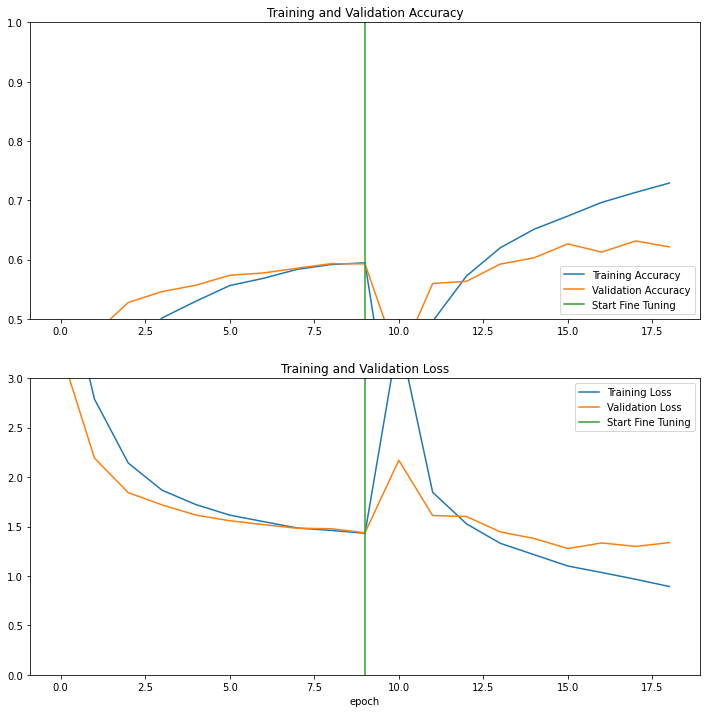

In [21]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([9,9],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 3.0])
plt.plot([9,9],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
gc.collect()

##Evaluation performance

In [ ]:
model.load_weights("/content/drive/MyDrive/ P6_Dogs/Best_model.hdf5")

In [ ]:
loss, accuracy = model.evaluate(test_set)
print('Test accuracy :', round(accuracy, 3))

25/25 [==============================] - 32s 1s/step - loss: 3.3115 - accuracy: 0.6837
Test accuracy : 0.684


In [ ]:
preds = model.predict(test_set, verbose = 1)

25/25 [==============================] - 27s 1s/step


In [ ]:
pred_labels = tf.argmax(preds, axis=1)

In [ ]:
test_labels = np.concatenate([y for x, y in test_set], axis=0)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, pred_labels, output_dict=True)

In [ ]:
f1scores = {}
for k,v in report.items():
    if k == 'accuracy':
        break
    else:
        f1scores[class_names[int(k)]] = v['f1-score']

In [ ]:
F1 = pd.DataFrame({"Classes":list(f1scores.keys()),
                   "F1-Scores":list(f1scores.values())}).sort_values("F1-Scores", ascending=False)

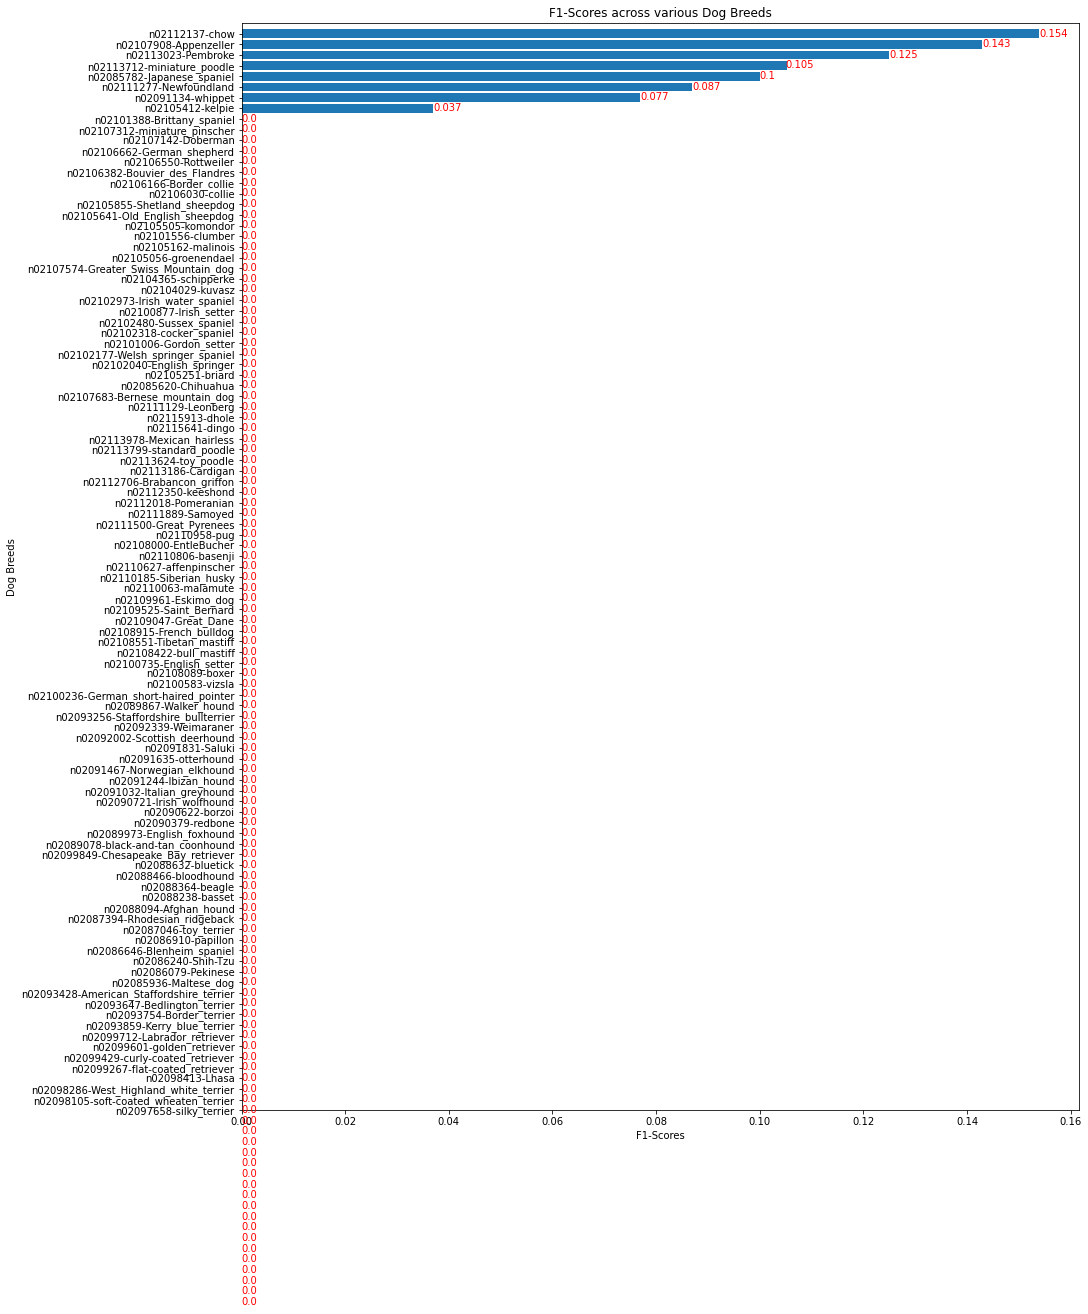

In [ ]:
fig, ax = plt.subplots(figsize = (15,20))
plt.barh(F1["Classes"], F1["F1-Scores"])
plt.ylim(-1,101)
plt.xlabel("F1-Scores")
plt.ylabel("Dog Breeds")
plt.title("F1-Scores across various Dog Breeds")
plt.gca().invert_yaxis()
for i, v in enumerate(round(F1["F1-Scores"],3)):
    ax.text(v, i + .25, str(v), color='red')

##Saving Model

In [ ]:
model.save("/content/drive/MyDrive/ P6_Dogs/my_model.h5")

#New prediction with new data

In [ ]:
with open("/content/drive/MyDrive/ P6_Dogs/Dogs_name.txt", "w") as output:
    output.write(str(class_names))

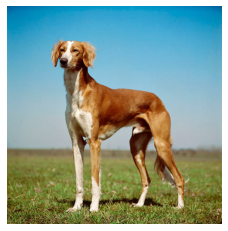

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

path_test = "/content/drive/MyDrive/ P6_Dogs/sluki.jpg"
test = load_img(path_test)

plt.axis("off")
plt.imshow(test)

In [ ]:
import cv2

img_test = img_to_array(test)
img_test = cv2.resize(img_test,(224,224))
img_test = img_test.reshape(1,224,224,3)
predictions = model.predict(img_test)
pred = tf.nn.softmax(predictions[0])
print("This image belongs to {}.".format(class_names[np.argmax(pred)])) 

This image belongs to n02091244-Ibizan_hound.


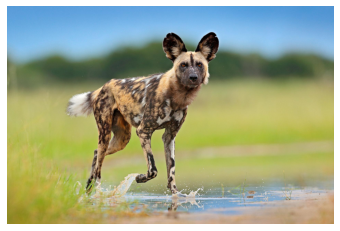

In [ ]:
path_test = "/content/drive/MyDrive/ P6_Dogs/african_hunting_dog.jpg"
test = load_img(path_test)

plt.axis("off")
plt.imshow(test)

In [ ]:
img_test = img_to_array(test)
img_test = cv2.resize(img_test,(224,224))
img_test = img_test.reshape(1,224,224,3)
predictions = model.predict(img_test)
pred = tf.nn.softmax(predictions[0])
print("This image belongs to {}.".format(class_names[np.argmax(pred)])) 

This image belongs to n02116738-African_hunting_dog.
